In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [51]:
MICs=read.csv("MIC_DDG.csv", header = TRUE, stringsAsFactors = FALSE)

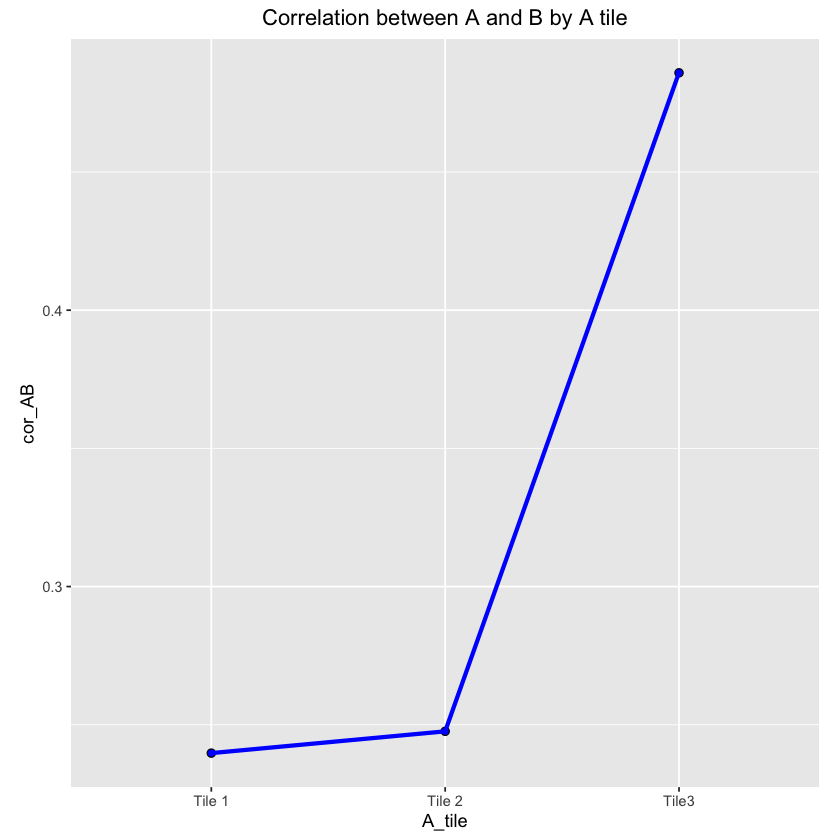

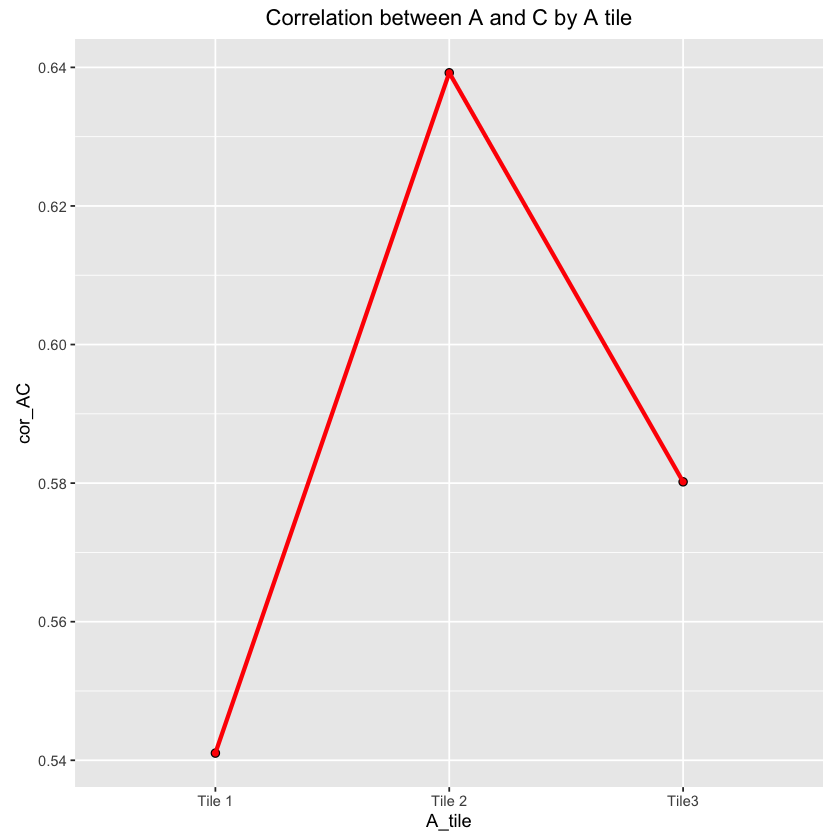

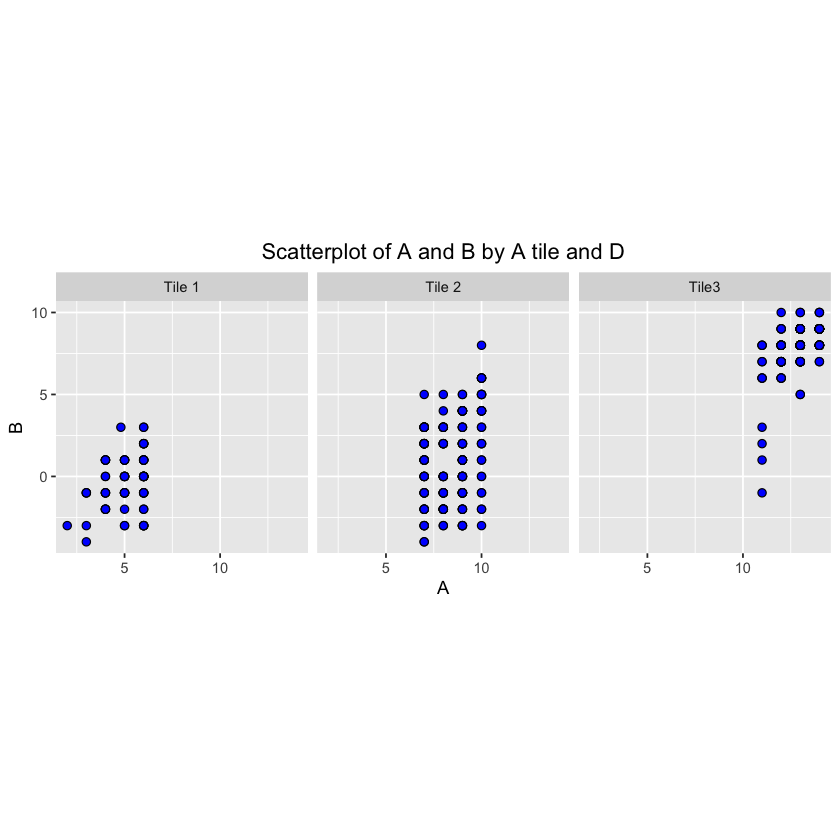

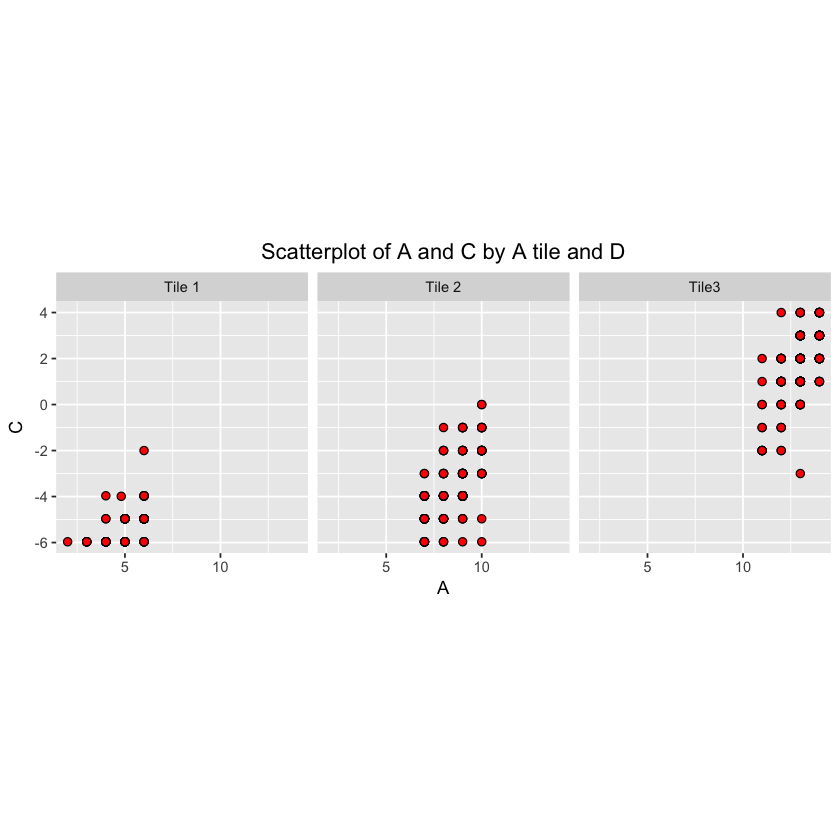

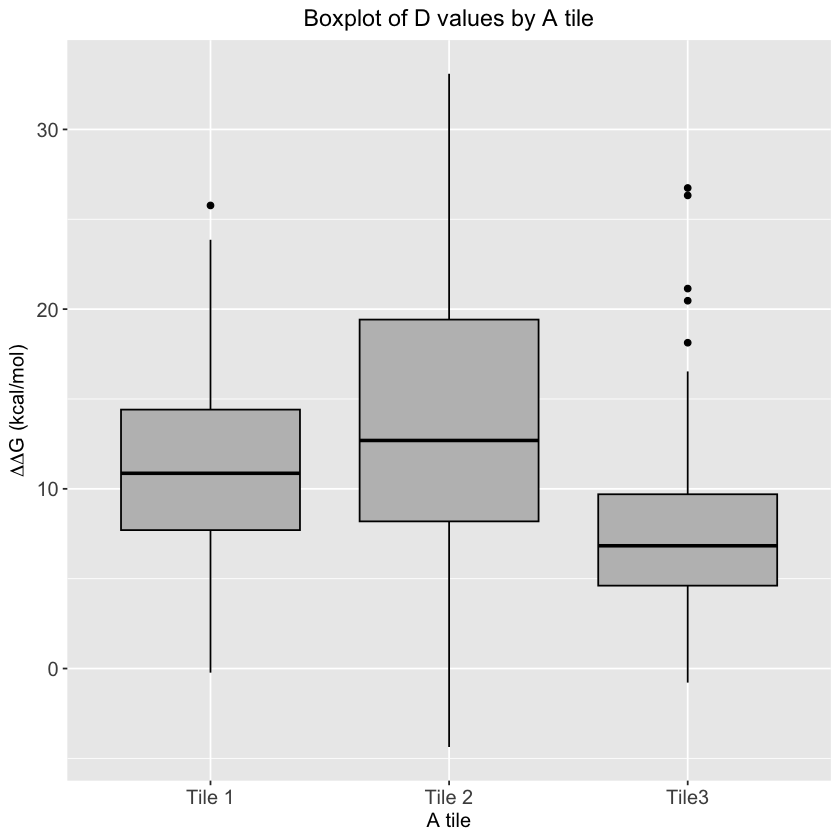

In [93]:


# create example data
set.seed(123)
df <- data.frame(A = as.numeric(MICs$AMP),
                 B = as.numeric(MICs$CTX),
                 C = as.numeric(MICs$MEM),
                 D = as.numeric(MICs$`ΔΔG`))

# create quantiles of A
df_equi <- df %>%
  mutate(A_tile = cut(A, breaks =3, labels = c("Tile 1", "Tile 2", "Tile3")))

# calculate correlations for each A tile
df_corr <- df_equi %>%
  group_by(A_tile) %>%
  summarize(cor_AB = cor(A, B, method = "spearman"),
            cor_AC = cor(A, C, method = "spearman"))

# plot correlations by A tile
ggplot(df_corr, aes(x = A_tile, y = cor_AB)) +
  geom_point(shape = 21, size = 2, fill = "blue", color = "black") +
  geom_line(linetype = "solid", size = 1.2, color = "blue", aes(group = 1)) +
  ggtitle("Correlation between A and B by A tile") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(aspect.ratio = 1)

ggplot(df_corr, aes(x = A_tile, y = cor_AC)) +
  geom_point(shape = 21, size = 2, fill = "red", color = "black") +
  geom_line(linetype = "solid", size = 1.2, color = "red", aes(group = 1)) +
  ggtitle("Correlation between A and C by A tile") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(aspect.ratio = 1)

# plot scatterplots of A and B/C by A tile and D
ggplot(df_equi, aes(x = A, y = B, color = D)) +
  geom_point(shape = 21, size = 2, fill = "blue", color = "black") +
  facet_wrap(~A_tile) +
  ggtitle("Scatterplot of A and B by A tile and D") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(aspect.ratio = 1)

ggplot(df_equi, aes(x = A, y = C, color = D)) +
  geom_point(shape = 21, size = 2, fill = "red", color = "black") +
  facet_wrap(~A_tile) +
  ggtitle("Scatterplot of A and C by A tile and D") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(aspect.ratio = 1)

# plot boxplots of D values for each tile as a separate plot
p <- ggplot(df_equi, aes(x = A_tile, y = D)) +
  geom_boxplot(fill = "grey", color = "black") +
  ggtitle("Boxplot of D values by A tile") +
  xlab("A tile") + ylab(expression(paste(Delta*Delta*G, " (kcal/mol)"))) + # use Greek alphabet in y label
  theme(plot.title = element_text(hjust = 0.5, size = 14), 
        axis.title.x = element_text(size = 12), 
        axis.title.y = element_text(size = 12), 
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 12)) # increase font size of labels and axis

# plot boxplots of D values for each tile as a separate plot
p <- ggplot(df_equi, aes(x = A_tile, y = D)) +
  geom_boxplot(fill = "grey", color = "black") +
  ggtitle("Boxplot of D values by A tile") +
  xlab("A tile") + ylab(expression(paste(Delta*Delta*G, " (kcal/mol)"))) + # use Greek alphabet in y label
  theme(plot.title = element_text(hjust = 0.5, size = 14), 
        axis.title.x = element_text(size = 12), 
        axis.title.y = element_text(size = 12), 
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 12)) # increase font size of labels and axis


p

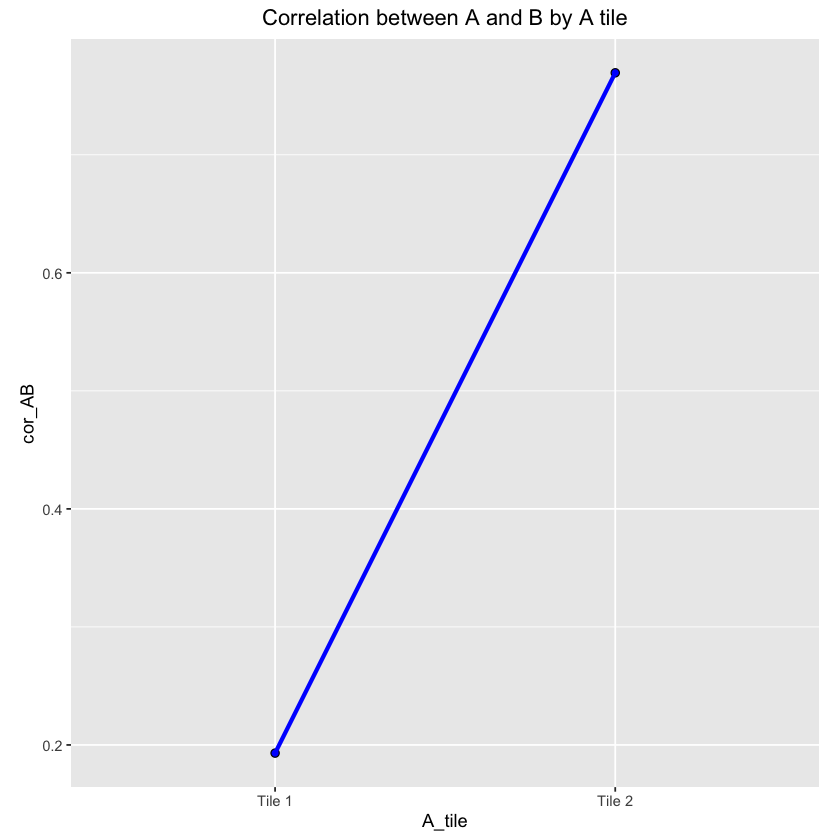

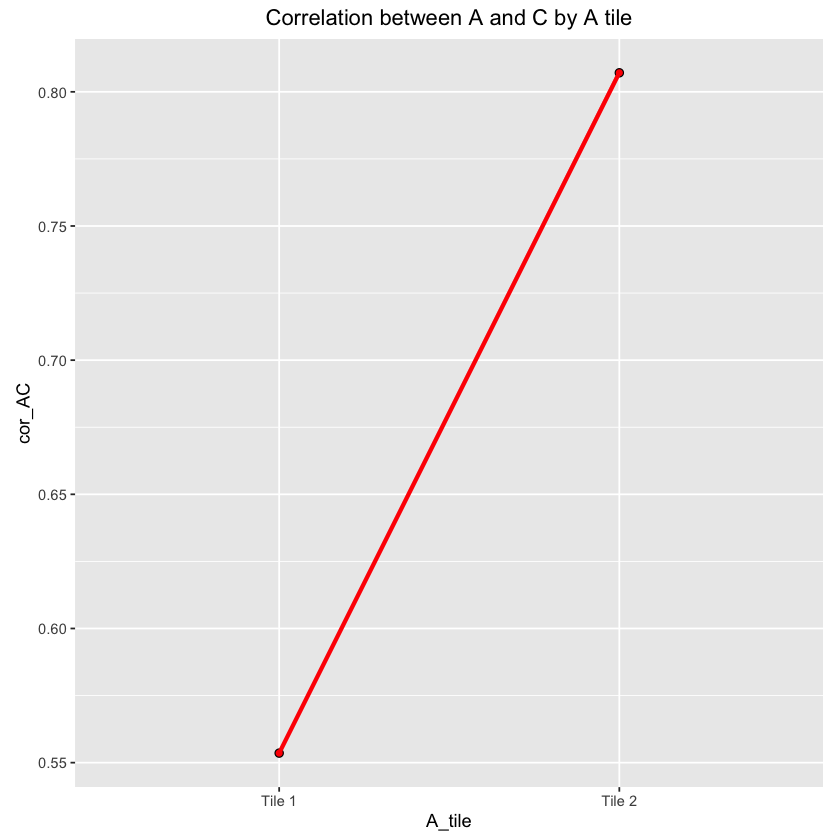

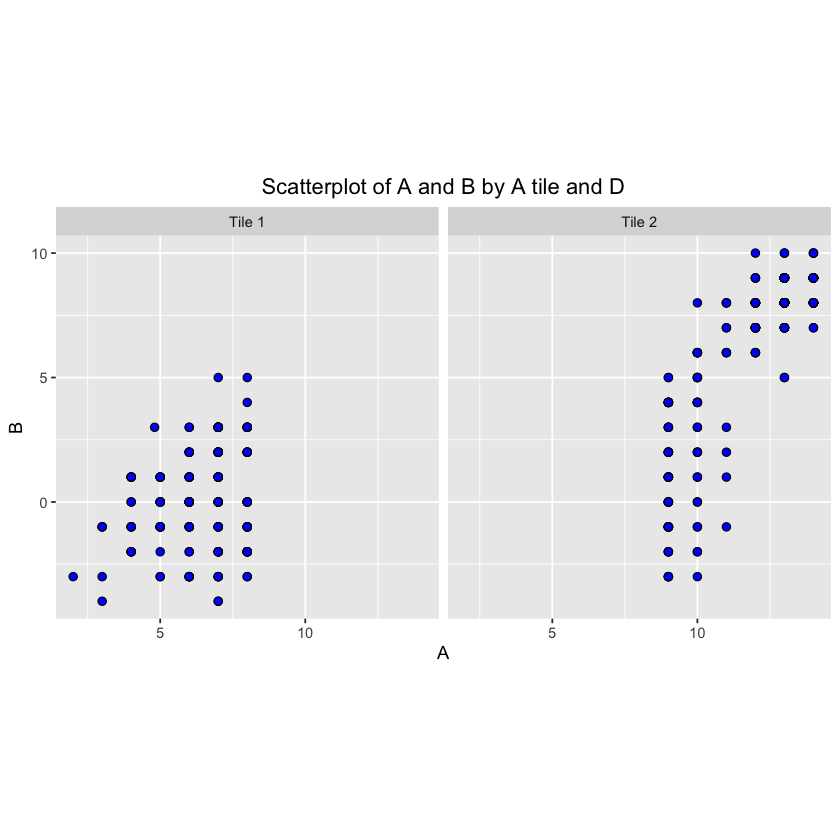

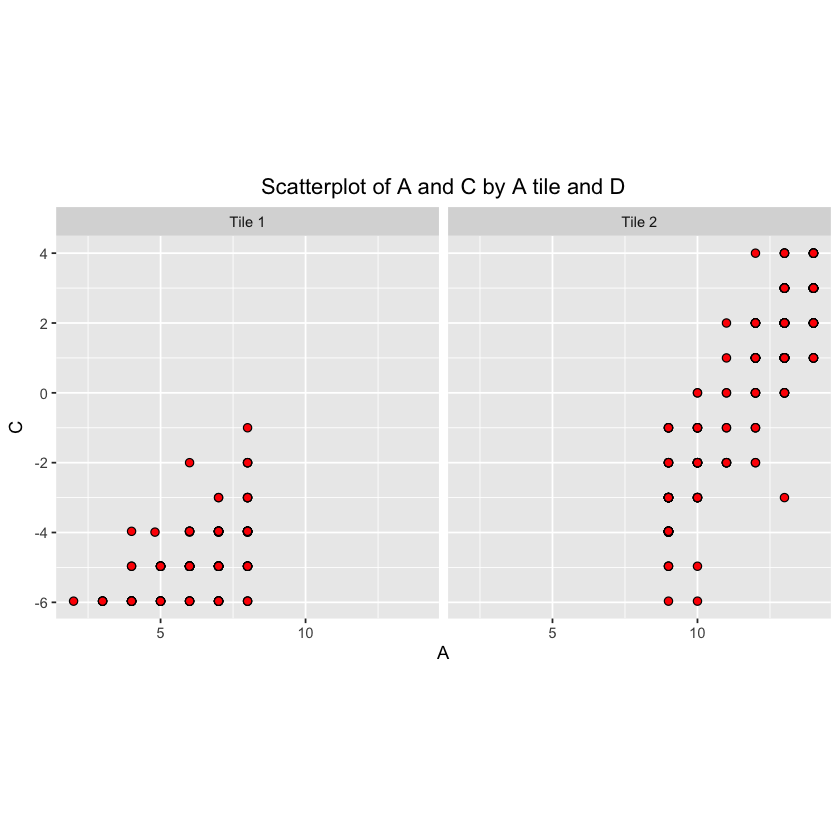

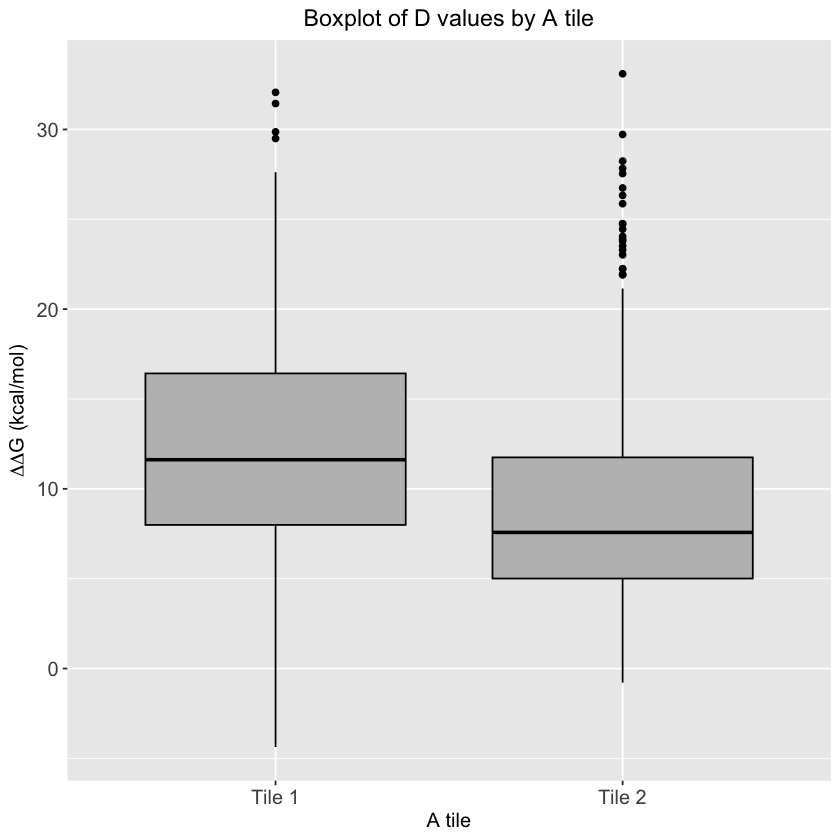

In [92]:


# create example data
set.seed(123)
df <- data.frame(A = as.numeric(MICs$AMP),
                 B = as.numeric(MICs$CTX),
                 C = as.numeric(MICs$MEM),
                 D = as.numeric(MICs$`ΔΔG`))

# create quantiles of A
df_equi <- df %>%
  mutate(A_tile = cut(A, breaks =2, labels = c("Tile 1", "Tile 2")))

# calculate correlations for each A tile
df_corr <- df_equi %>%
  group_by(A_tile) %>%
  summarize(cor_AB = cor(A, B, method = "spearman"),
            cor_AC = cor(A, C, method = "spearman"))

# plot correlations by A tile
ggplot(df_corr, aes(x = A_tile, y = cor_AB)) +
  geom_point(shape = 21, size = 2, fill = "blue", color = "black") +
  geom_line(linetype = "solid", size = 1.2, color = "blue", aes(group = 1)) +
  ggtitle("Correlation between A and B by A tile") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(aspect.ratio = 1)

ggplot(df_corr, aes(x = A_tile, y = cor_AC)) +
  geom_point(shape = 21, size = 2, fill = "red", color = "black") +
  geom_line(linetype = "solid", size = 1.2, color = "red", aes(group = 1)) +
  ggtitle("Correlation between A and C by A tile") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(aspect.ratio = 1)

# plot scatterplots of A and B/C by A tile and D
ggplot(df_equi, aes(x = A, y = B, color = D)) +
  geom_point(shape = 21, size = 2, fill = "blue", color = "black") +
  facet_wrap(~A_tile) +
  ggtitle("Scatterplot of A and B by A tile and D") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(aspect.ratio = 1)

ggplot(df_equi, aes(x = A, y = C, color = D)) +
  geom_point(shape = 21, size = 2, fill = "red", color = "black") +
  facet_wrap(~A_tile) +
  ggtitle("Scatterplot of A and C by A tile and D") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(aspect.ratio = 1)


# plot boxplots of D values for each tile as a separate plot
p <- ggplot(df_equi, aes(x = A_tile, y = D)) +
  geom_boxplot(fill = "grey", color = "black") +
  ggtitle("Boxplot of D values by A tile") +
  xlab("A tile") + ylab(expression(paste(Delta*Delta*G, " (kcal/mol)"))) + # use Greek alphabet in y label
  theme(plot.title = element_text(hjust = 0.5, size = 14), 
        axis.title.x = element_text(size = 12), 
        axis.title.y = element_text(size = 12), 
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 12)) # increase font size of labels and axis


p

In [34]:
index_high=which(MICs$AMP > median(MICs$AMP))
index_low=which(MICs$AMP < median(MICs$AMP))

cor.test(MICs$AMP[index_high], MICs$CTX[index_high], method="spearman")
cor.test(MICs$AMP[index_low], MICs$CTX[index_low], method="spearman")

cor.test(MICs$AMP[index_high], MICs$MEM[index_high], method="spearman")
cor.test(MICs$AMP[index_low], MICs$MEM[index_low], method="spearman")




[1] 12

Warning message in cor.test.default(MICs$AMP[index_high], MICs$CTX[index_high], :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  MICs$AMP[index_high] and MICs$CTX[index_high]
S = 1787141, p-value = 8.435e-06
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2797025 


Warning message in cor.test.default(MICs$AMP[index_low], MICs$CTX[index_low], method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  MICs$AMP[index_low] and MICs$CTX[index_low]
S = 1755844, p-value = 4.989e-11
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.3936206 


Warning message in cor.test.default(MICs$AMP[index_high], MICs$MEM[index_high], :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  MICs$AMP[index_high] and MICs$MEM[index_high]
S = 1326364, p-value = 1.256e-14
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.4654162 


Warning message in cor.test.default(MICs$AMP[index_low], MICs$MEM[index_low], method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  MICs$AMP[index_low] and MICs$MEM[index_low]
S = 661107, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7716873 


### Different FoldX calculations

In [19]:
MIC_DDG=read.csv("MIC_DDG.csv")

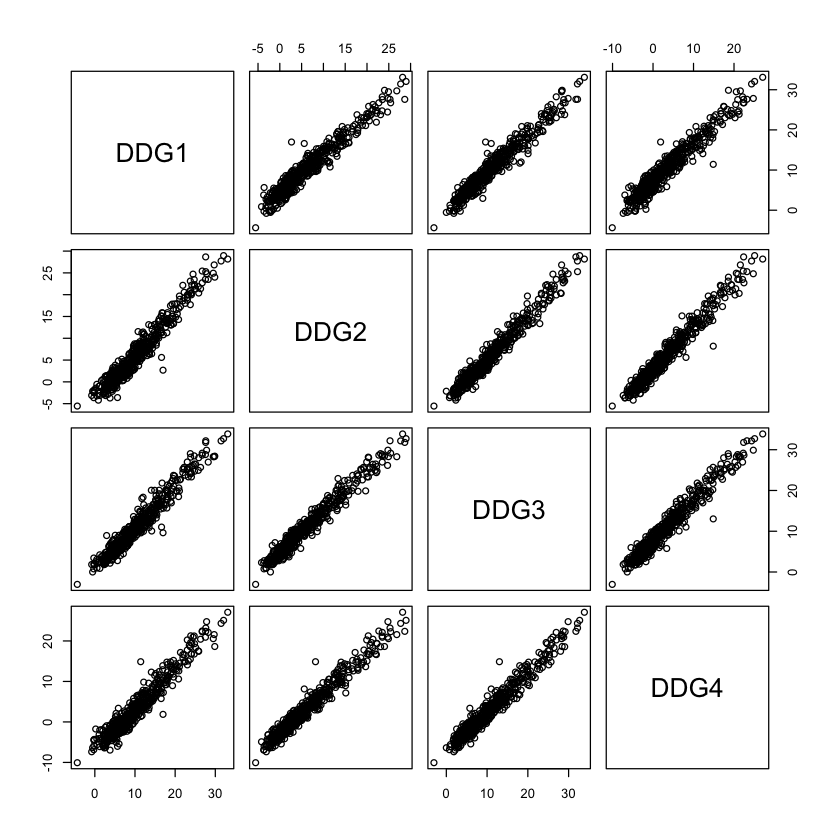

In [4]:
pairs(MIC_DDG[,seq(7,10)])

corrplot 0.92 loaded



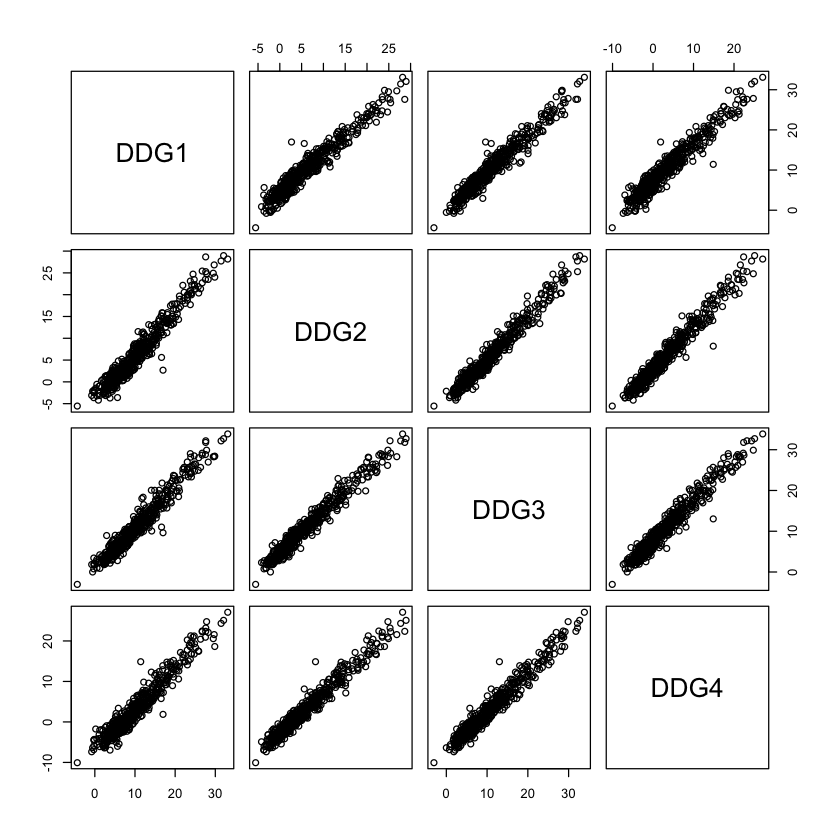

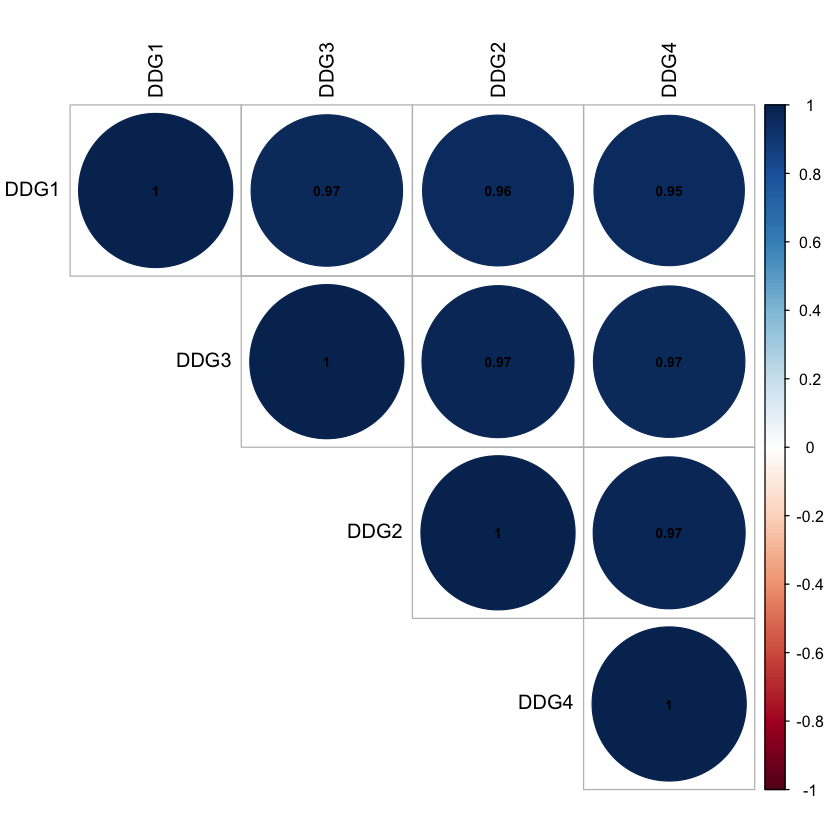

In [5]:
data=MIC_DDG[,seq(7,10)]

# Load the corrplot package
library(corrplot)

# Calculate the Spearman correlation matrix
cor_matrix <- cor(data, method = "spearman")

# Create the scatterplot matrix
pairs(data)

# Add the Spearman correlation coefficients to the plot
corrplot(cor_matrix, type = "upper", order = "hclust", tl.col = "black", 
         addCoef.col = "black", number.cex = 0.7)


In [17]:
#DDG=rowMeans(MIC_DDG[,seq(8,10)])
DDG=MIC_DDG$DDG1

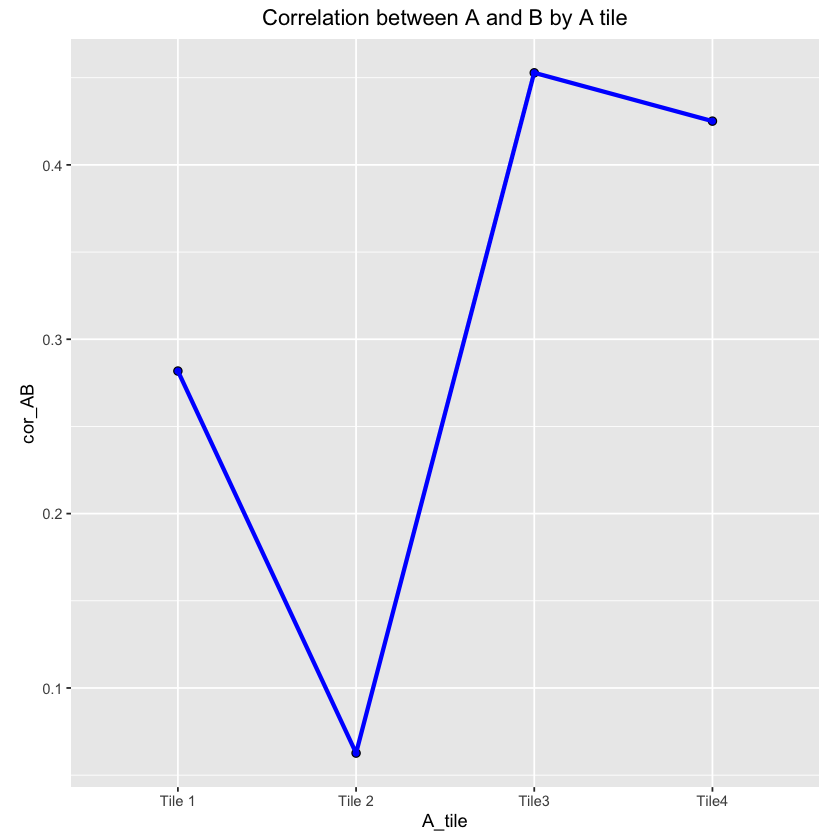

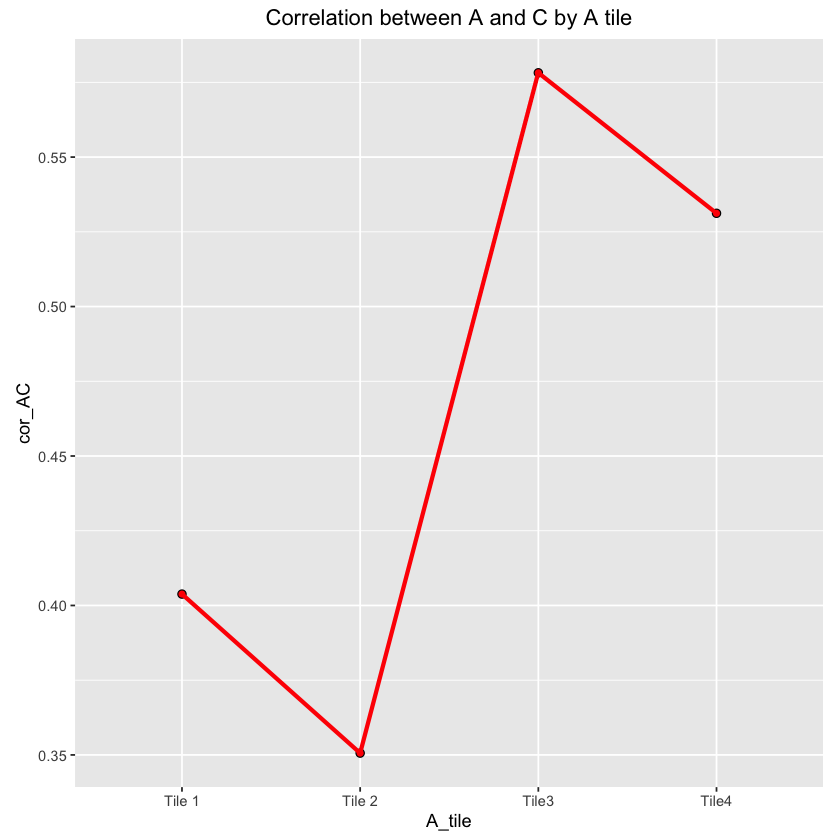

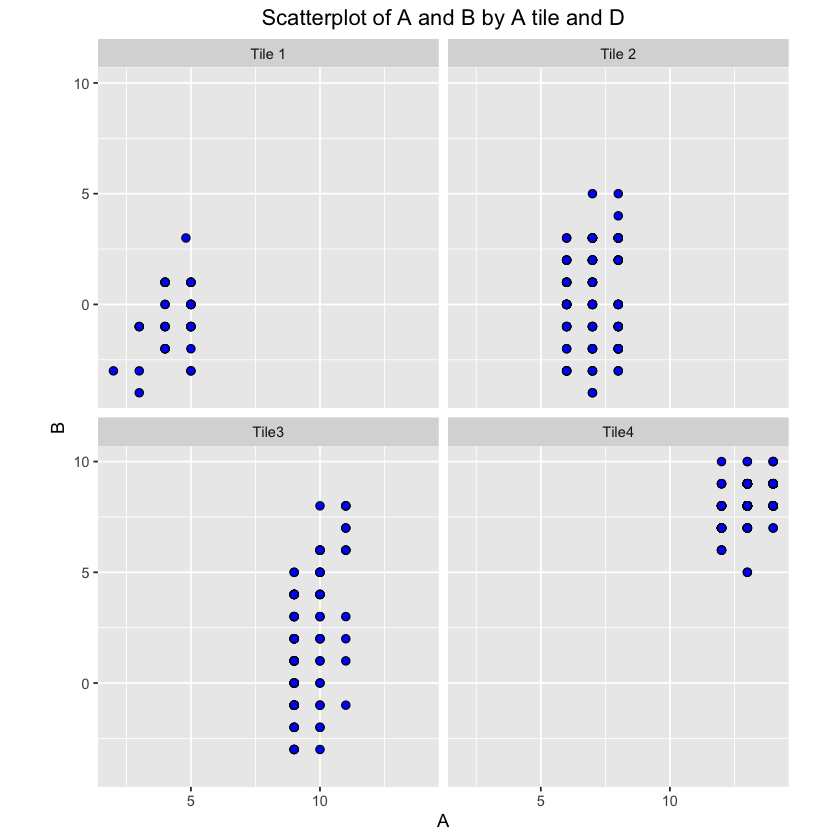

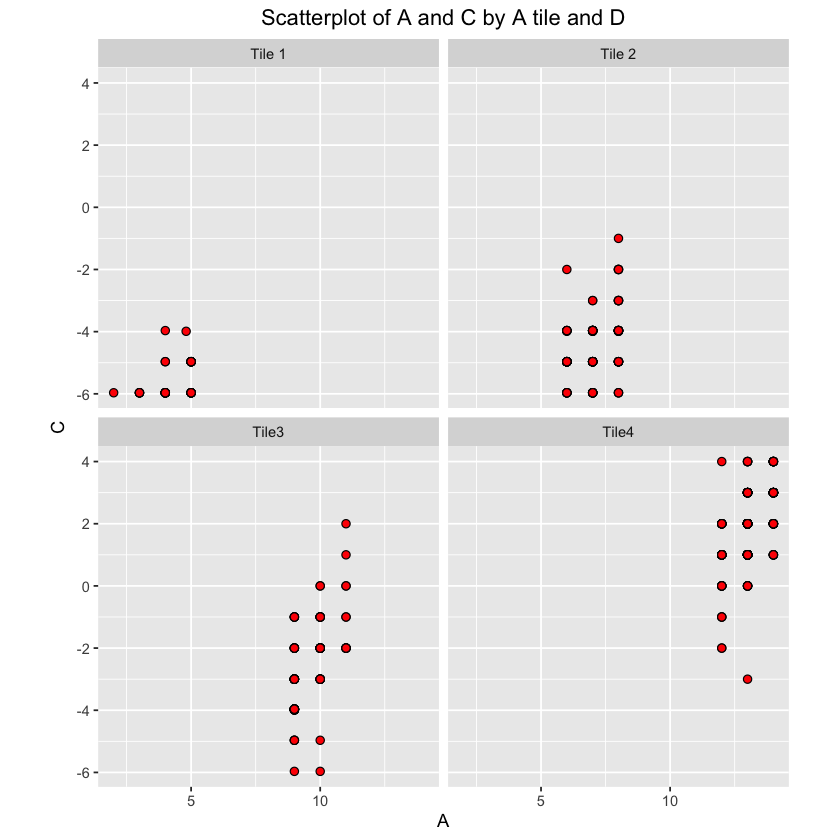

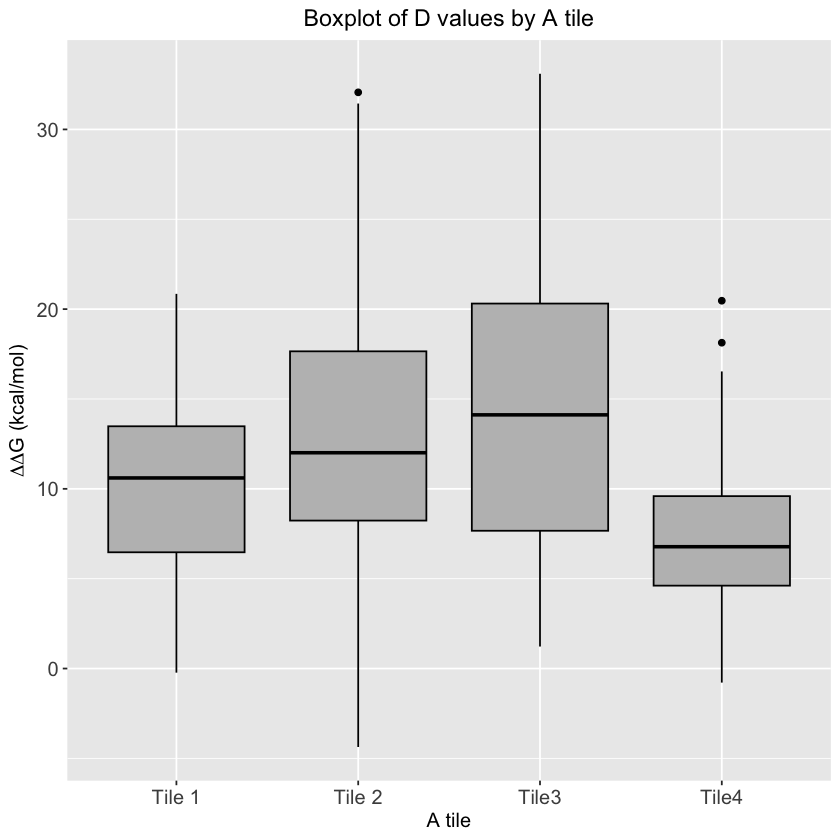

In [27]:
# create example data
set.seed(123)
df <- data.frame(A = as.numeric(MIC_DDG$AMP_log2),
                 B = as.numeric(MIC_DDG$CTX_log2),
                 C = as.numeric(MIC_DDG$MEM_log2),
                 D = as.numeric(DDG))

# create quantiles of A
df_equi <- df %>%
  mutate(A_tile = cut(A, breaks =4, labels = c("Tile 1", "Tile 2", "Tile3", "Tile4")))

# calculate correlations for each A tile
df_corr <- df_equi %>%
  group_by(A_tile) %>%
  summarize(cor_AB = cor(A, B, method = "spearman"),
            cor_AC = cor(A, C, method = "spearman"))

# plot correlations by A tile
ggplot(df_corr, aes(x = A_tile, y = cor_AB)) +
  geom_point(shape = 21, size = 2, fill = "blue", color = "black") +
  geom_line(linetype = "solid", size = 1.2, color = "blue", aes(group = 1)) +
  ggtitle("Correlation between A and B by A tile") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(aspect.ratio = 1)

ggplot(df_corr, aes(x = A_tile, y = cor_AC)) +
  geom_point(shape = 21, size = 2, fill = "red", color = "black") +
  geom_line(linetype = "solid", size = 1.2, color = "red", aes(group = 1)) +
  ggtitle("Correlation between A and C by A tile") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(aspect.ratio = 1)

# plot scatterplots of A and B/C by A tile and D
ggplot(df_equi, aes(x = A, y = B, color = D)) +
  geom_point(shape = 21, size = 2, fill = "blue", color = "black") +
  facet_wrap(~A_tile) +
  ggtitle("Scatterplot of A and B by A tile and D") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(aspect.ratio = 1)

ggplot(df_equi, aes(x = A, y = C, color = D)) +
  geom_point(shape = 21, size = 2, fill = "red", color = "black") +
  facet_wrap(~A_tile) +
  ggtitle("Scatterplot of A and C by A tile and D") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(aspect.ratio = 1)

# plot boxplots of D values for each tile as a separate plot
p <- ggplot(df_equi, aes(x = A_tile, y = D)) +
  geom_boxplot(fill = "grey", color = "black") +
  ggtitle("Boxplot of D values by A tile") +
  xlab("A tile") + ylab(expression(paste(Delta*Delta*G, " (kcal/mol)"))) + # use Greek alphabet in y label
  theme(plot.title = element_text(hjust = 0.5, size = 14), 
        axis.title.x = element_text(size = 12), 
        axis.title.y = element_text(size = 12), 
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 12)) # increase font size of labels and axis

# plot boxplots of D values for each tile as a separate plot
p <- ggplot(df_equi, aes(x = A_tile, y = D)) +
  geom_boxplot(fill = "grey", color = "black") +
  ggtitle("Boxplot of D values by A tile") +
  xlab("A tile") + ylab(expression(paste(Delta*Delta*G, " (kcal/mol)"))) + # use Greek alphabet in y label
  theme(plot.title = element_text(hjust = 0.5, size = 14), 
        axis.title.x = element_text(size = 12), 
        axis.title.y = element_text(size = 12), 
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 12)) # increase font size of labels and axis


p

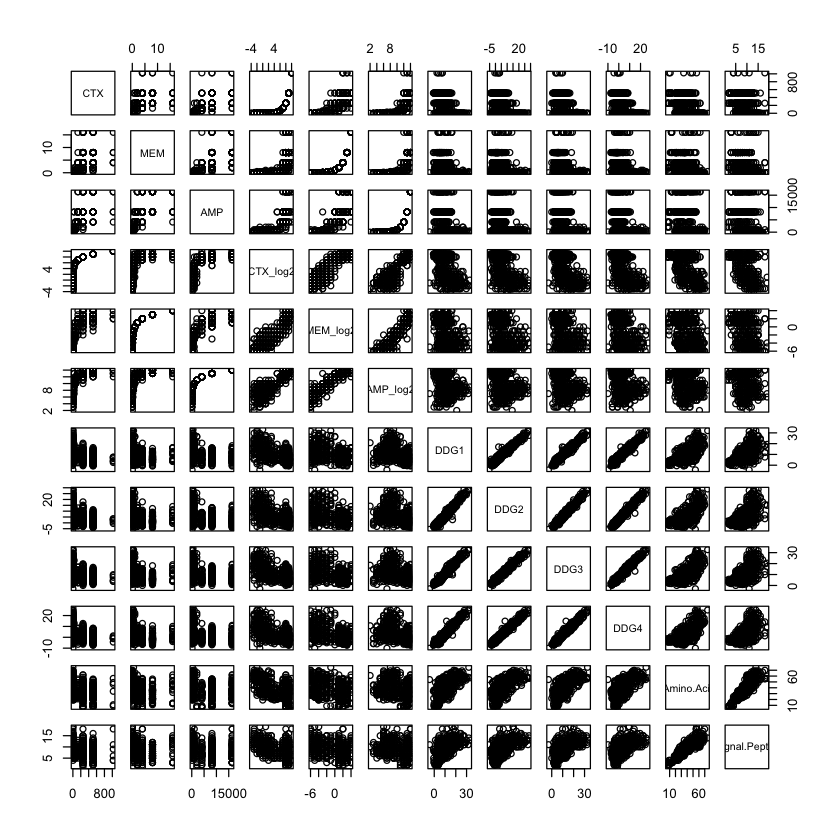

In [21]:
pairs(MIC_DDG)

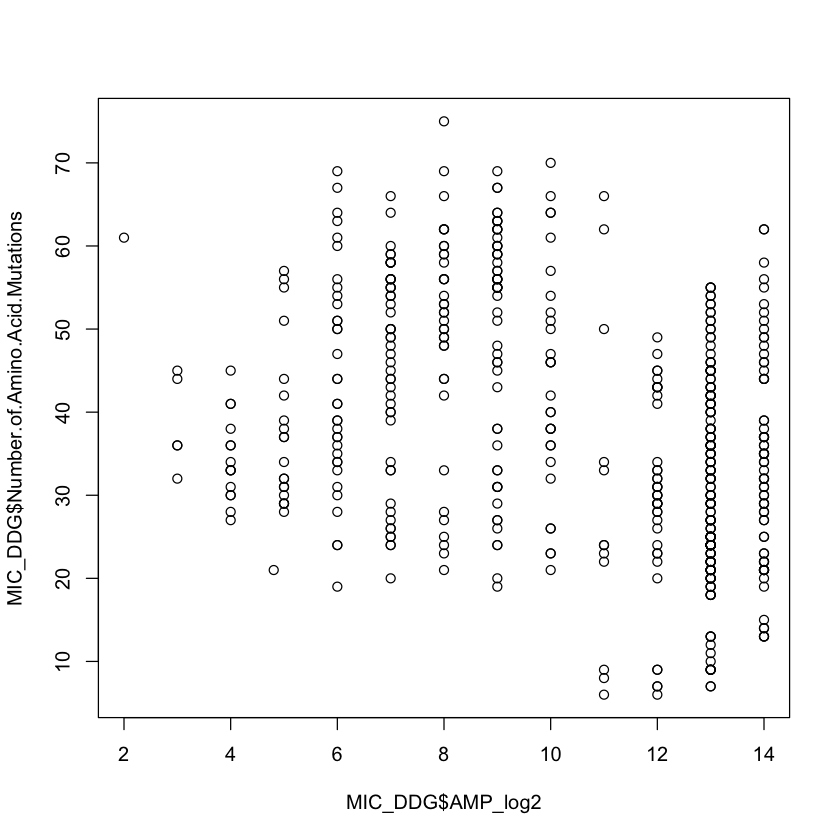

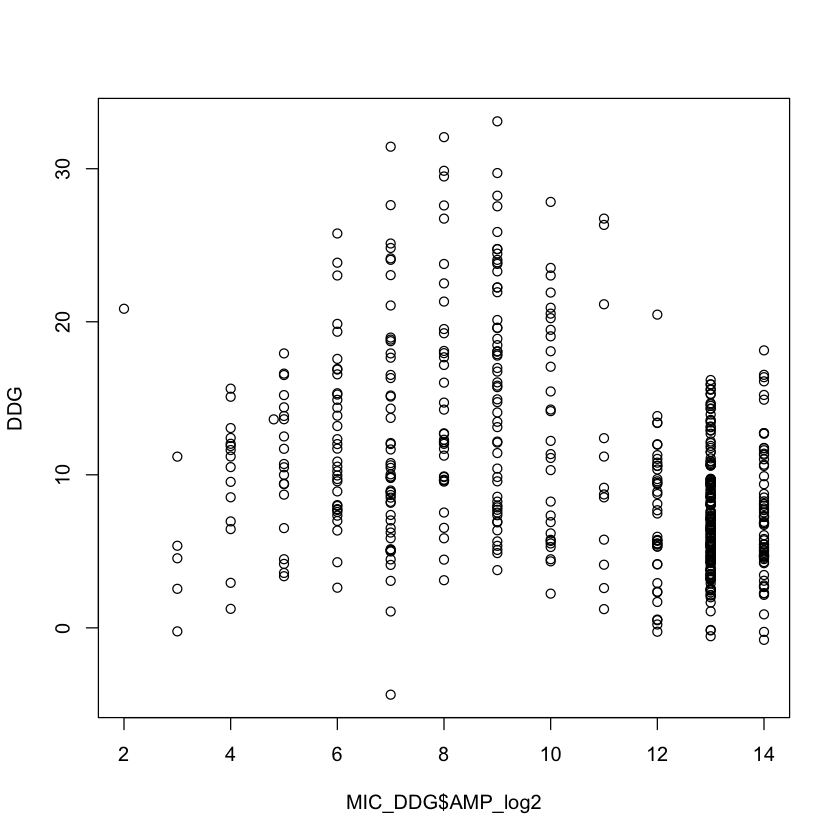

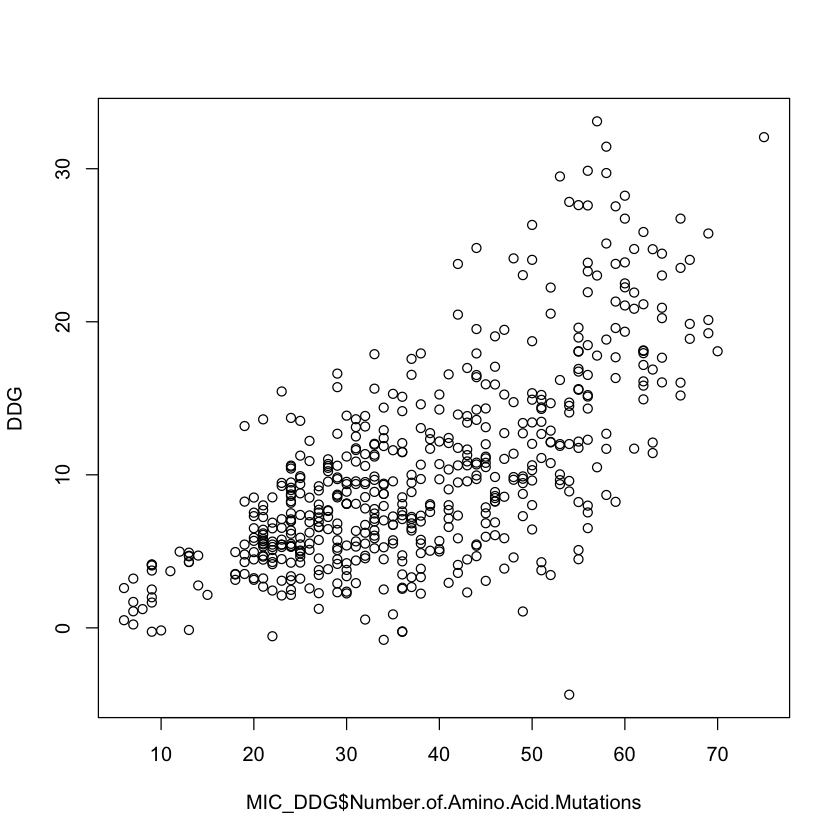

In [28]:
plot(MIC_DDG$AMP_log2, MIC_DDG$Number.of.Amino.Acid.Mutations)
plot(MIC_DDG$AMP_log2, DDG)
plot(MIC_DDG$Number.of.Amino.Acid.Mutations, DDG)

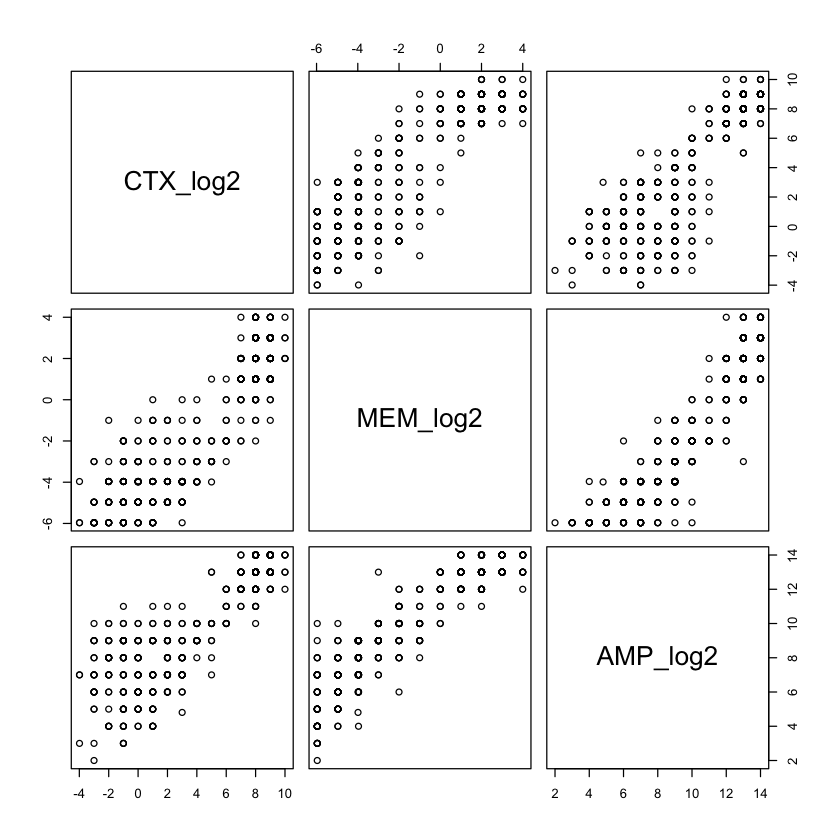

In [29]:
pairs(MIC_DDG[,seq(4,6)])

In [41]:
Stability=DDG
AMP_MIC=MIC_DDG$AMP_log2
n_aminoacids=MIC_DDG$Number.of.Amino.Acid.Mutations

fit <- lm(AMP_MIC ~ Stability +  n_aminoacids)
summary(fit)


Call:
lm(formula = AMP_MIC ~ Stability + n_aminoacids)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5030 -1.7827  0.9728  2.1182  5.5066 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.23482    0.34952  37.865  < 2e-16 ***
Stability    -0.09495    0.02694  -3.525  0.00046 ***
n_aminoacids -0.04871    0.01194  -4.080 5.18e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.903 on 542 degrees of freedom
Multiple R-squared:  0.1466,	Adjusted R-squared:  0.1434 
F-statistic: 46.54 on 2 and 542 DF,  p-value: < 2.2e-16


Warning message in cor.test.default(Stability, AMP_MIC, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  Stability and AMP_MIC
S = 36925733, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.3686498 


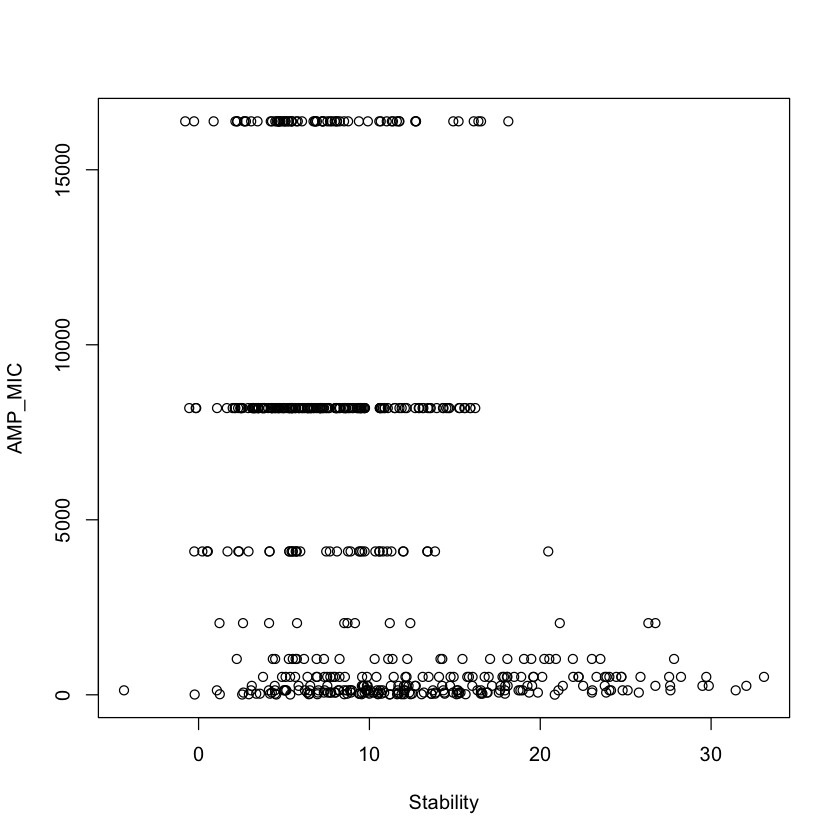

In [39]:
plot(Stability, AMP_MIC)
cor.test(Stability, AMP_MIC, method = "spearman")

## Muliple linear regression analysis 

In [23]:
NDLo=read.csv("FoldX_results_MIC.csv")
NDLo=as.data.frame(NDLo)

In [27]:
# Fit a weighted regression model
weighted_model <- lm(R2_amp_cfx ~ DDG, data = NDLo, weights = 1 / (DDG_sd^2))

# Print the summary of the weighted model
summary(weighted_model)

# Get p-values for coefficient significance
coef_summary <- summary(weighted_model)$coefficients
p_values <- coef_summary[, "Pr(>|t|)"]



Call:
lm(formula = R2_amp_cfx ~ DDG, data = NDLo, weights = 1/(DDG_sd^2))

Weighted Residuals:
      Min        1Q    Median        3Q       Max 
-0.078118 -0.029545  0.003358  0.019533  0.061828 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.163448   0.109084  10.666 1.78e-07 ***
DDG         -0.042061   0.009212  -4.566 0.000648 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04042 on 12 degrees of freedom
Multiple R-squared:  0.6347,	Adjusted R-squared:  0.6042 
F-statistic: 20.85 on 1 and 12 DF,  p-value: 0.000648



	Pearson's product-moment correlation

data:  NDLo$R2_amp_cfx and NDLo$DDG
t = -3.542, df = 12, p-value = 0.004056
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9029807 -0.2970043
sample estimates:
       cor 
-0.7149231 


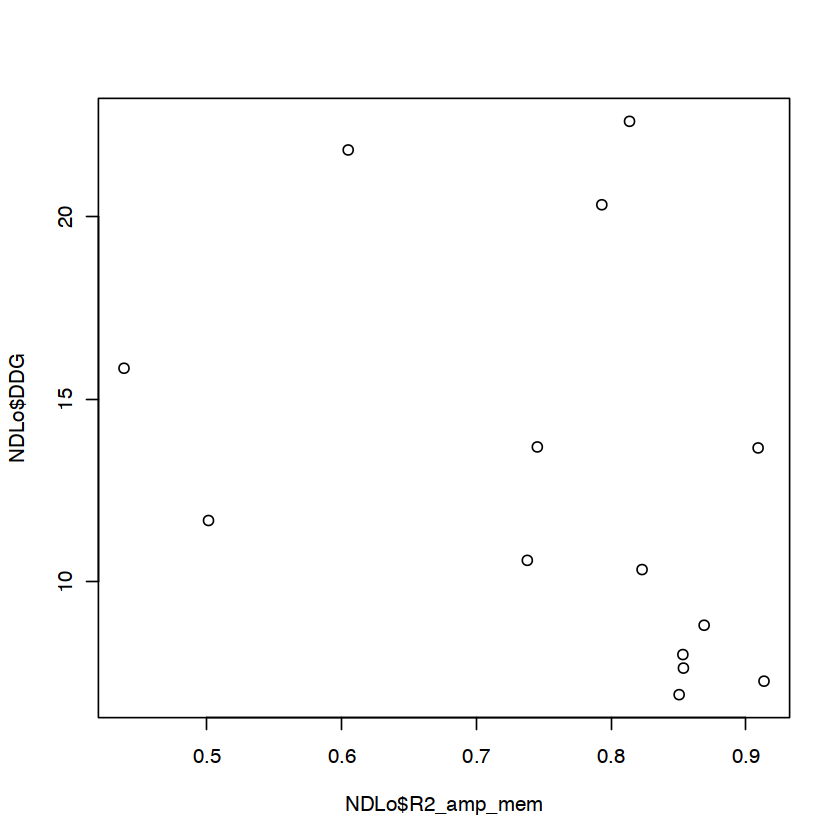

In [22]:
cor.test(NDLo$R2_amp_cfx, NDLo$DDG)
plot(NDLo$R2_amp_mem, NDLo$DDG)

In [7]:
fit <- lm(R2_amp_cfx ~ MIC + DDG, data = NDLo)

In [16]:
model_with_both_predictors <- lm(R2_amp_cfx ~ MIC + DDG, data = NDLo)
summary(model_with_both_predictors)

model_with_both_predictors <- lm(R2_amp_mem ~ MIC + DDG, data = NDLo)
summary(model_with_both_predictors)


Call:
lm(formula = R2_amp_cfx ~ MIC + DDG, data = NDLo)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52943 -0.07406  0.04875  0.13670  0.31555 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.063e+00  2.118e-01   5.018 0.000391 ***
MIC          1.552e-05  3.658e-05   0.424 0.679522    
DDG         -3.962e-02  1.378e-02  -2.874 0.015124 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2433 on 11 degrees of freedom
Multiple R-squared:  0.519,	Adjusted R-squared:  0.4315 
F-statistic: 5.934 on 2 and 11 DF,  p-value: 0.01786



Call:
lm(formula = R2_amp_mem ~ MIC + DDG, data = NDLo)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.28860 -0.02781  0.02796  0.08130  0.16915 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.431e-01  1.265e-01   6.664 3.54e-05 ***
MIC          1.618e-05  2.185e-05   0.741    0.474    
DDG         -7.729e-03  8.234e-03  -0.939    0.368    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1453 on 11 degrees of freedom
Multiple R-squared:  0.1882,	Adjusted R-squared:  0.04065 
F-statistic: 1.275 on 2 and 11 DF,  p-value: 0.3176


In [18]:
# Fit the full model (with both predictors)
full_model <- lm(R2_amp_cfx ~ MIC + DDG, data = NDLo)

# Fit the reduced model (with only one predictor)
reduced_model <- lm(R2_amp_cfx ~ MIC, data = NDLo)

# Perform the likelihood ratio test
lrt <- lrtest(full_model, reduced_model)

# Print the likelihood ratio test result
print(lrt)


# Fit the full model (with both predictors)
full_model <- lm(R2_amp_cfx ~ MIC + DDG, data = NDLo)

# Fit the reduced model (with only one predictor)
reduced_model <- lm(R2_amp_cfx ~ DDG, data = NDLo)

# Perform the likelihood ratio test
lrt <- lrtest(full_model, reduced_model)

# Print the likelihood ratio test result
print(lrt)



Likelihood ratio test

Model 1: R2_amp_cfx ~ MIC + DDG
Model 2: R2_amp_cfx ~ MIC
  #Df  LogLik Df  Chisq Pr(>Chisq)   
1   4  1.6139                        
2   3 -2.3077 -1 7.8432   0.005101 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Likelihood ratio test

Model 1: R2_amp_cfx ~ MIC + DDG
Model 2: R2_amp_cfx ~ DDG
  #Df LogLik Df  Chisq Pr(>Chisq)
1   4 1.6139                     
2   3 1.5003 -1 0.2273     0.6335


In [19]:
# Fit the full model (with both predictors)
full_model <- lm(R2_amp_mem ~ MIC + DDG, data = NDLo)

# Fit the reduced model (with only one predictor)
reduced_model <- lm(R2_amp_mem ~ MIC, data = NDLo)

# Perform the likelihood ratio test
lrt <- lrtest(full_model, reduced_model)

# Print the likelihood ratio test result
print(lrt)


# Fit the full model (with both predictors)
full_model <- lm(R2_amp_mem ~ MIC + DDG, data = NDLo)

# Fit the reduced model (with only one predictor)
reduced_model <- lm(R2_amp_mem ~ MIC, data = NDLo)

# Perform the likelihood ratio test
lrt <- lrtest(full_model, reduced_model)

# Print the likelihood ratio test result
print(lrt)


Likelihood ratio test

Model 1: R2_amp_mem ~ MIC + DDG
Model 2: R2_amp_mem ~ MIC
  #Df LogLik Df  Chisq Pr(>Chisq)
1   4 8.8278                     
2   3 8.2884 -1 1.0788      0.299
Likelihood ratio test

Model 1: R2_amp_mem ~ MIC + DDG
Model 2: R2_amp_mem ~ MIC
  #Df LogLik Df  Chisq Pr(>Chisq)
1   4 8.8278                     
2   3 8.2884 -1 1.0788      0.299
